In [180]:


queries = {
    "shapes": """
        PREFIX ex: <http://example.org/>
        PREFIX p1: <https://idmc.univ-lorraine.fr/sw/p1#>
        PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

        SELECT ?shape ?name
        WHERE {
            ?shape a p1:Shape ;
                   p1:name ?name .
        }
    """,
    "locations": """
        PREFIX ex: <http://example.org/>
        PREFIX p1: <https://idmc.univ-lorraine.fr/sw/p1#>
        
        SELECT ?location ?latitude ?longitude
        WHERE {
            ?location a p1:Location ;
                      p1:latitude ?latitude ;
                      p1:longitude ?longitude .
        }
    """,
    "sightings": """
        PREFIX ex: <http://example.org/>
        PREFIX p1: <https://idmc.univ-lorraine.fr/sw/p1#>
        PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

        SELECT ?sighting ?shape ?location ?date ?time ?duration
        WHERE {
            ?sighting a p1:SightingEvent ;
                      p1:shape ?shape ;
                      p1:location ?location ;
                      p1:date ?date ;
                      p1:time ?time .
            OPTIONAL { ?sighting p1:duration ?duration . }
        }
    """
}


In [181]:

sightings = g.query(queries["sightings"])
shapes = {}
locations = {}


results_shapes = g.query(queries["shapes"])
for row in results_shapes:
    shape_uri = str(row.shape)
    shape_name = str(row.name)
    shapes[shape_uri] = shape_name


results_locations = g.query(queries["locations"])
for row in results_locations:
    location_uri = str(row.location)
    latitude = str(row.latitude)
    longitude = str(row.longitude)
    locations[location_uri] = (latitude, longitude)


for row in sightings:
    sighting_uri = str(row.sighting)
    shape_uri = str(row.shape)
    location_uri = str(row.location)
    date = str(row.date)
    time = str(row.time)
    duration = str(row.duration) if row.duration else "N/A"
    
    shape_name = shapes.get(shape_uri, "Unknown")
    location_coords = locations.get(location_uri, ("Unknown", "Unknown"))
    
    print(f"Sighting: {sighting_uri}")
    print(f"  Shape: {shape_name}")
    print(f"  Location: {location_coords}")
    print(f"  Date: {date}")
    print(f"  Time: {time}")
    print(f"  Duration: {duration}")
    print("\n")


Sighting: https://idmc.univ-lorraine.fr/sw/ex#SightingEvent0
  Shape: cylinder
  Location: ('29.8830556', '-97.9411111')
  Date: 1949-10-10
  Time: 20:30:00
  Duration: PT45M


Sighting: https://idmc.univ-lorraine.fr/sw/ex#SightingEvent1
  Shape: circle
  Location: ('28.9783333', '-96.6458333')
  Date: 1956-10-10
  Time: 21:00:00
  Duration: PT20S


Sighting: https://idmc.univ-lorraine.fr/sw/ex#SightingEvent10
  Shape: unknown
  Location: ('37.1536111', '-83.7619444')
  Date: 1970-10-10
  Time: 19:00:00
  Duration: PT3M


Sighting: https://idmc.univ-lorraine.fr/sw/ex#SightingEvent11
  Shape: oval
  Location: ('35.8238889', '-80.2536111')
  Date: 1971-10-10
  Time: 21:00:00
  Duration: PT30S


Sighting: https://idmc.univ-lorraine.fr/sw/ex#SightingEvent12
  Shape: circle
  Location: ('36.8430556', '-83.3219444')
  Date: 1972-10-10
  Time: 19:00:00
  Duration: PT20M


Sighting: https://idmc.univ-lorraine.fr/sw/ex#SightingEvent13
  Shape: disk
  Location: ('42.5377778', '-83.2330556')
  Da

In [182]:
# Shape Counts
query_shape_counts = """



    PREFIX ex: <http://example.org/>
    PREFIX p1: <https://idmc.univ-lorraine.fr/sw/p1#>

    SELECT ?name (COUNT(?sighting) AS ?count)
    WHERE {
    ?sighting a p1:SightingEvent ;
              p1:shape ?shape .
    ?shape p1:name ?name .
}
GROUP BY ?name
"""

print(" Shape Counts")
results = g.query(query_shape_counts)
for row in results:
    print(", ".join(str(value) for value in row))
print("\n")

 Shape Counts
cylinder, 1
circle, 4
unknown, 8
oval, 3
disk, 7
other, 4
light, 8
rectangle, 2
chevron, 1
sphere, 3
formation, 2
triangle, 5
cigar, 1
fireball, 1




In [183]:

#  Events Date Time

query_events_date_time = """
    PREFIX ex: <http://example.org/>
    PREFIX p1: <https://idmc.univ-lorraine.fr/sw/p1#>

    SELECT ?sighting ?date ?time
    WHERE {
        ?sighting a p1:SightingEvent ;
                  p1:date ?date ;
                  p1:time ?time .
    }
"""
print("Results for query: Events Date Time")
results = g.query(query_events_date_time)
for row in results:
    print(", ".join(str(value) for value in row))
print("\n")


Results for query: Events Date Time
https://idmc.univ-lorraine.fr/sw/ex#SightingEvent0, 1949-10-10, 20:30:00
https://idmc.univ-lorraine.fr/sw/ex#SightingEvent1, 1956-10-10, 21:00:00
https://idmc.univ-lorraine.fr/sw/ex#SightingEvent10, 1970-10-10, 19:00:00
https://idmc.univ-lorraine.fr/sw/ex#SightingEvent11, 1971-10-10, 21:00:00
https://idmc.univ-lorraine.fr/sw/ex#SightingEvent12, 1972-10-10, 19:00:00
https://idmc.univ-lorraine.fr/sw/ex#SightingEvent13, 1972-10-10, 22:30:00
https://idmc.univ-lorraine.fr/sw/ex#SightingEvent14, 1973-10-10, 19:00:00
https://idmc.univ-lorraine.fr/sw/ex#SightingEvent15, 1974-10-10, 19:30:00
https://idmc.univ-lorraine.fr/sw/ex#SightingEvent16, 1974-10-10, 23:00:00
https://idmc.univ-lorraine.fr/sw/ex#SightingEvent17, 1975-10-10, 17:00:00
https://idmc.univ-lorraine.fr/sw/ex#SightingEvent18, 1976-10-10, 20:30:00
https://idmc.univ-lorraine.fr/sw/ex#SightingEvent19, 1977-10-10, 12:00:00
https://idmc.univ-lorraine.fr/sw/ex#SightingEvent2, 1960-10-10, 20:00:00
https

In [184]:
# Locations
query_locations = """
    PREFIX ex: <http://example.org/>
    PREFIX p1: <https://idmc.univ-lorraine.fr/sw/p1#>

    SELECT ?location ?latitude ?longitude
    WHERE {
        ?location a p1:Location ;
                  p1:latitude ?latitude ;
                  p1:longitude ?longitude .
    }
"""

print("Results for query: Locations")
results = g.query(query_locations)
for row in results:
    print(", ".join(str(value) for value in row))
print("\n")

Results for query: Locations
https://idmc.univ-lorraine.fr/sw/ex#Location0, 29.8830556, -97.9411111
https://idmc.univ-lorraine.fr/sw/ex#Location1, 28.9783333, -96.6458333
https://idmc.univ-lorraine.fr/sw/ex#Location10, 37.1536111, -83.7619444
https://idmc.univ-lorraine.fr/sw/ex#Location11, 35.8238889, -80.2536111
https://idmc.univ-lorraine.fr/sw/ex#Location12, 36.8430556, -83.3219444
https://idmc.univ-lorraine.fr/sw/ex#Location13, 42.5377778, -83.2330556
https://idmc.univ-lorraine.fr/sw/ex#Location14, 41.3252778, -72.1936111
https://idmc.univ-lorraine.fr/sw/ex#Location15, 42.3916667, -71.5666667
https://idmc.univ-lorraine.fr/sw/ex#Location16, 38.1055556, -98.6597222
https://idmc.univ-lorraine.fr/sw/ex#Location17, 32.8544444, -79.975
https://idmc.univ-lorraine.fr/sw/ex#Location18, 45.5827778, -122.3522222
https://idmc.univ-lorraine.fr/sw/ex#Location19, 29.4238889, -98.4933333
https://idmc.univ-lorraine.fr/sw/ex#Location2, 21.4180556, -157.8036111
https://idmc.univ-lorraine.fr/sw/ex#Loca

In [185]:
# storing locations in an array
locations = []

for row in results:
    location_tuple = (float(row.latitude), float(row.longitude))
    locations.append(location_tuple)


print("Locations array:")
print(locations)

Locations array:
[(29.8830556, -97.9411111), (28.9783333, -96.6458333), (37.1536111, -83.7619444), (35.8238889, -80.2536111), (36.8430556, -83.3219444), (42.5377778, -83.2330556), (41.3252778, -72.1936111), (42.3916667, -71.5666667), (38.1055556, -98.6597222), (32.8544444, -79.975), (45.5827778, -122.3522222), (29.4238889, -98.4933333), (21.4180556, -157.8036111), (38.2541667, -85.7594444), (40.7008333, -73.7133333), (41.7002778, -73.9213889), (32.7152778, -117.1563889), (38.7583333, -104.7425), (32.7833333, -96.8), (42.9955556, -71.4552778), (44.7630556, -85.6205556), (41.0338889, -73.7633333), (36.595, -82.1888889), (43.0388889, -87.9063889), (43.9627778, -70.2830556), (40.015, -105.27), (47.6063889, -122.3308333), (34.1577778, -118.6375), (46.7163889, -122.9530556), (31.7058333, -83.6533333), (35.235, -75.6288889), (40.2736111, -76.8847222), (30.1586111, -85.6602778), (41.1175, -73.4083333), (29.6158333, -95.5575), (35.8905556, -83.7247222), (32.7591667, -97.7969444), (40.6936111, -

In [186]:

query_events_duration = """
    PREFIX ex: <http://example.org/>
    PREFIX p1: <https://idmc.univ-lorraine.fr/sw/p1#>
    PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

    SELECT ?duration
    WHERE {
        ?sighting a p1:SightingEvent ;
                  p1:duration ?duration .
    }
"""


results = g.query(query_events_duration)


In [187]:

# Avg duration 
total_duration = timedelta(seconds=0)
count = 0


for row in results:
    duration_str = str(row.duration)
    
    # from string into a timedelta object
    duration = timedelta()
    try:
        duration = timedelta(minutes=int(duration_str[2:-1]))
        total_duration += duration
        count += 1
    except ValueError:
        print(f"Invalid duration format: {duration_str}")

# Calculate average duration
if count > 0:
    avg_duration = total_duration / count
    print(f"Average Duration of the sightings: {avg_duration}")
else:
    print("No valid durations found in the data.")

Average Duration of the sightings: 0:11:34.800000


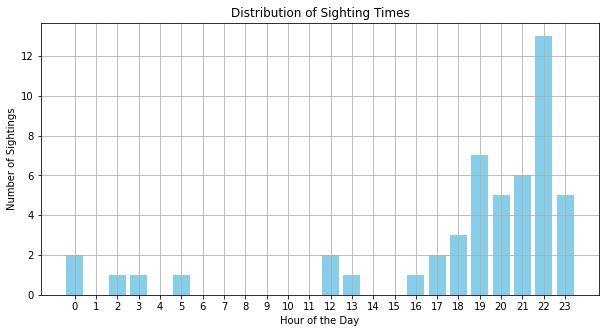

In [188]:
import matplotlib.pyplot as plt

time_counts = defaultdict(int)

# occurrences for each hour
for sighting_time in time_distribution:
    hour = sighting_time.hour
    time_counts[hour] += 1

# Sort time  by hour
sorted_time_counts = sorted(time_counts.items())

# Extract hours and counts for plotting
hours = [item[0] for item in sorted_time_counts]
counts = [item[1] for item in sorted_time_counts]


plt.figure(figsize=(10, 5))
plt.bar(hours, counts, width=0.8, color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sightings')
plt.title('Distribution of Sighting Times')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


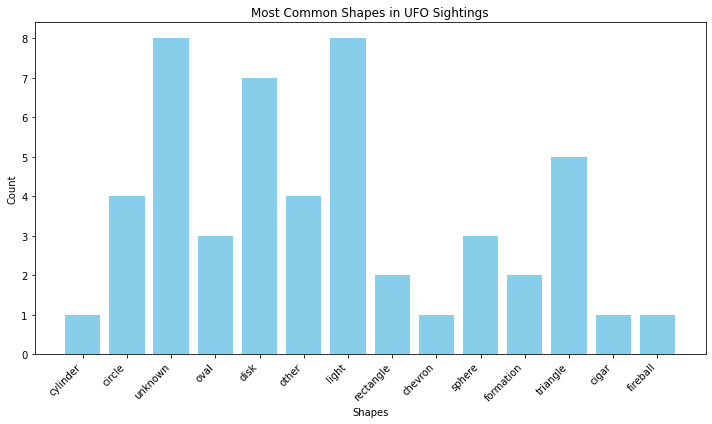

In [189]:
# Most commun shapes
shapes = []
counts = []
for row in results_shape_counts:
    shapes.append(str(row['name']))
    counts.append(int(row['count']))

### Create Plots ###

# Plot for Shape Counts (Bar Plot)
plt.figure(figsize=(10, 6))
plt.bar(shapes, counts, color='skyblue')
plt.xlabel('Shapes')
plt.ylabel('Count')
plt.title('Most Common Shapes in UFO Sightings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

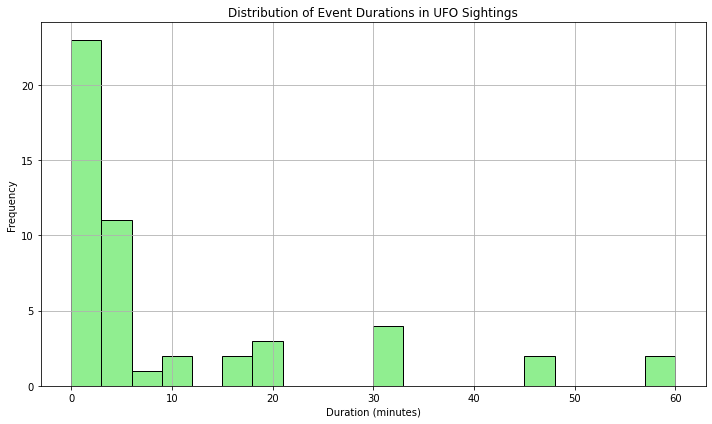

In [190]:
# distribution of  durations 
durations = []
for row in results_event_durations:
    duration_str = str(row['duration'])
    try:
        # parse duration string into minutes
        if duration_str.startswith('PT'):
            if 'H' in duration_str:  # Hours format
                duration_minutes = int(duration_str.split('H')[0][2:]) * 60
            elif 'M' in duration_str:  # Minutes format
                duration_minutes = int(duration_str.split('M')[0][2:])
            elif 'S' in duration_str:  # Seconds format
                duration_minutes = round(int(duration_str.split('S')[0][2:]) / 60)
            else:
                continue  # Skip unexpected formats

            durations.append(duration_minutes)
        else:
            # Handle other unexpected formats or skip them
            print(f"Skipping invalid duration format: {duration_str}")

    except ValueError:
        print(f"Error parsing duration: {duration_str}")




plt.figure(figsize=(10, 6))
plt.hist(durations, bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Event Durations in UFO Sightings')
plt.grid(True)
plt.tight_layout()
plt.show()


In [191]:
# separate locations into US and UK based on longitude 
us_locations = [(lat, lon) for lat, lon in locations if lon < -20 or lon > 20]
uk_locations = [(lat, lon) for lat, lon in locations if -20 <= lon <= 20]

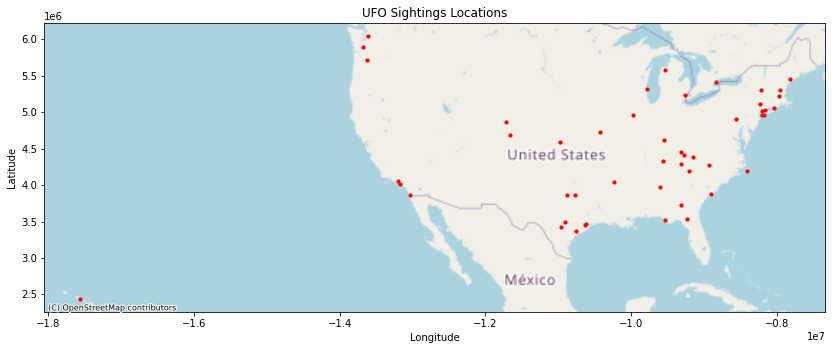

In [192]:
#US map 
gdf = gpd.GeoDataFrame(
    geometry=[Point(lon, lat) for lat, lon in us_locations],
    crs="EPSG:4326"
)


fig, ax = plt.subplots(figsize=(14, 10))
gdf = gdf.to_crs(epsg=3857)  # Convert to web mercator


gdf.plot(ax=ax, color='red', markersize=10)

# Add basemap 
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)


plt.title('UFO Sightings Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


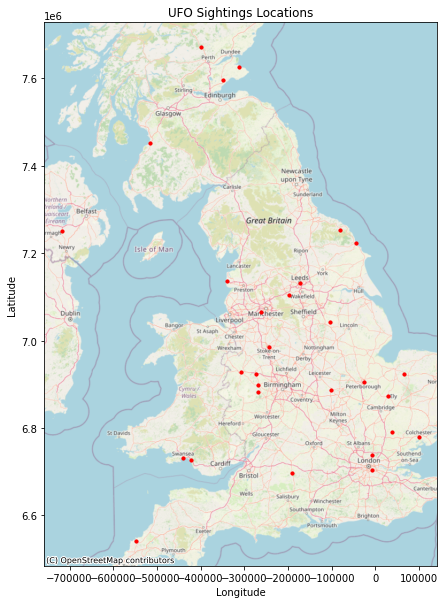

In [193]:
# UK map
gdf = gpd.GeoDataFrame(
    geometry=[Point(lon, lat) for lat, lon in uk_locations],
    crs="EPSG:4326"
)


fig, ax = plt.subplots(figsize=(14, 10))
gdf = gdf.to_crs(epsg=3857)  # Convert to web mercator


gdf.plot(ax=ax, color='red', markersize=10)


ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)


plt.title('UFO Sightings Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
